<a href="https://colab.research.google.com/github/stephenliu713/python_data-analysis/blob/main/05_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 什么是API？

> **应用程序接口**（英语：Application Programming Interface），缩写为API，是一种计算接口，它定义多个软件中介之间的**交互**，以及可以进行的**调用（call）**或**请求（request）**的种类，如何进行调用或发出请求，应使用的数据格式，应遵循的惯例等。

我们已经通过`read_csv()`和`read_excel`读取并处理过文件，但许多时候更方便的方法是从云端直接获取数据。

网络爬虫是一种方式，但是耗时很长。**通过API接口获取数据更加快捷方便。**

优点：

* 只下载需要的数据即可
* 不需要预先载入数据
* 不需要为了爬虫研究复杂的网页结构
* 可以始终获取到最新数据

缺点：

* 代码必须在线运行
* **API接口的可达性(accessibility)**

# 1. 通过API获取数据

每个API都有自己的调用规范。**一般来说，提供API接口的网站都会附上详细的技术文档和操作示例。** 参考它们是最简洁的方式。


## 1.1 pandas自带的API接口 `import pandas_datareader.data as web` → `web.DataReader`

pandas预留了[一些常用数据网站的API接口](https://pandas.pydata.org/docs/ecosystem.html?highlight=datareader)（大部分是与经济/金融有关的公开数据），通过`pandas_datareader`可以非常轻松的获取这些数据。

* Google Finance

* Tiingo

* Morningstar

* IEX

* Robinhood

* Enigma

* Quandl

* FRED

* Fama/French

* World Bank

* OECD

* Eurostat

* TSP Fund Data

* Nasdaq Trader Symbol Definitions

* Stooq Index Data

* MOEX Data

### 1.1.1 以FRED为例

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline


下面我们以FRED（一个经济与金融数据库，国内可以直接访问）为例。

我们希望得到**中国近几十年的GDP数据**。现在我们需要中国GDP所对应的数据代码（code），不同数据的代码请前往[FRED官网](https://fred.stlouisfed.org/)直接搜索。

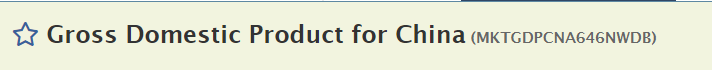

In [ ]:
df_gdpcn = web.DataReader(['MKTGDPCNA646NWDB'],
                           'fred',
                           start = '1960-01-01')
df_gdpcn.head()

,MKTGDPCNA646NWDB
DATE,
1960-01-01,5.971647e+10
1961-01-01,5.005687e+10
1962-01-01,4.720936e+10
1963-01-01,5.070680e+10
1964-01-01,5.970834e+10


我们对数据进行一些简单的处理来使可读性更高。

In [ ]:
# codes重命名
df_gdpcn.rename(columns = {'MKTGDPCNA646NWDB':'GDP_CN'},
                inplace=True)
df_gdpcn.head()

,GDP_CN
DATE,
1960-01-01,5.971647e+10
1961-01-01,5.005687e+10
1962-01-01,4.720936e+10
1963-01-01,5.070680e+10
1964-01-01,5.970834e+10


In [ ]:
# 单位转换 -> billion
df_gdpcn['GDP_CN_bn'] = df_gdpcn['GDP_CN']/1000000000
df_gdpcn.head()

,GDP_CN,GDP_CN_bn
DATE,,
1960-01-01,5.971647e+10,59.716468
1961-01-01,5.005687e+10,50.056869
1962-01-01,4.720936e+10,47.209359
1963-01-01,5.070680e+10,50.706800
1964-01-01,5.970834e+10,59.708343


我们参照上章的方法将这些数据可视化

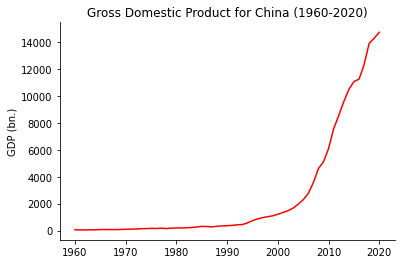

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_gdpcn.index, df_gdpcn['GDP_CN_bn'],
        color = 'red')

ax.set_ylabel('GDP (bn.)')
ax.set_title('Gross Domestic Product for China (1960-2020)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## 1.2 其他API接口

API本质上是一项服务，而服务的提供商们对于这项服务的整合程度和开放程度都不同。

对于非专业编程者来说，从0开始搭建一个API框架是十分困难的。因此，如果你需要的服务开放了API，**先找找是否有人已经搭好了API框架**。**不要重复造轮子！**

### 1.2.1 以bilibili-api为例

Bilibili开放了可以各种查询视频相关信息的API，Github上有人将它整合为了一个第三方库[bilibili-api](https://github.com/MoyuScript/bilibili-api)。

In [ ]:
pip install bilibili-api

In [ ]:
from bilibili_api import video, sync
from threading import Thread
import asyncio

In [ ]:
async def main():
    v = video.Video('BV1s34y1Q7Kq') # 输入BV号
    print(await v.get_info())

def thread():
    try:
        asyncio.get_event_loop()
    except:
        asyncio.set_event_loop(asyncio.new_event_loop())
    sync(main())

th = Thread(target=thread)

th.start()
th.join()


{'bvid': 'BV1s34y1Q7Kq', 'aid': 805381915, 'videos': 2, 'tid': 130, 'tname': '音乐综合', 'copyright': 1, 'pic': 'http://i1.hdslb.com/bfs/archive/6d96ae0729d42957928bfe00b1ea695ab333657e.png', 'title': '管弦乐·魔卡少女樱OP - CLEAR', 'pubdate': 1631195062, 'ctime': 1631195062, 'desc': '网易云音乐：https://music.163.com/song?id=1876800780&userid=132211598\r\n\r\n喜欢的可以三连转发关注支持一下_(:з」∠)_', 'desc_v2': [{'raw_text': '网易云音乐：https://music.163.com/song?id=1876800780&userid=132211598\r\n\r\n喜欢的可以三连转发关注支持一下_(:з」∠)_', 'type': 1, 'biz_id': 0}], 'state': 0, 'duration': 1836, 'rights': {'bp': 0, 'elec': 0, 'download': 1, 'movie': 0, 'pay': 0, 'hd5': 0, 'no_reprint': 1, 'autoplay': 1, 'ugc_pay': 0, 'is_cooperation': 0, 'ugc_pay_preview': 0, 'no_background': 0, 'clean_mode': 0, 'is_stein_gate': 0, 'is_360': 0, 'no_share': 0}, 'owner': {'mid': 660303135, 'name': '摸鱼Script', 'face': 'http://i0.hdslb.com/bfs/face/99895125d7ea820dc13f15b499b5c9b73dd576de.jpg'}, 'stat': {'aid': 805381915, 'view': 1416, 'danmaku': 1, 'reply': 